> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb movie data set investigation.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#For analysis, I am selecting only few columns from the database, as mentioned below.
df = df[['id','original_title','director', 'popularity','genres','vote_count','vote_average','budget','revenue','release_year']]

In [5]:
df.head()

,id,original_title,director,popularity,genres,vote_count,vote_average,budget,revenue,release_year
0,135397,Jurassic World,Colin Trevorrow,32.985763,Action|Adventure|Science Fiction|Thriller,5562,6.5,150000000,1513528810,2015
1,76341,Mad Max: Fury Road,George Miller,28.419936,Action|Adventure|Science Fiction|Thriller,6185,7.1,150000000,378436354,2015
2,262500,Insurgent,Robert Schwentke,13.112507,Adventure|Science Fiction|Thriller,2480,6.3,110000000,295238201,2015
3,140607,Star Wars: The Force Awakens,J.J. Abrams,11.173104,Action|Adventure|Science Fiction|Fantasy,5292,7.5,200000000,2068178225,2015
4,168259,Furious 7,James Wan,9.335014,Action|Crime|Thriller,2947,7.3,190000000,1506249360,2015


In [6]:
dfm = df.copy()

In [11]:
dfm = df.assign(genres = df['genres'].str.split('|')).explode('genres')

AttributeError: 'DataFrame' object has no attribute 'explode'

In [13]:
pd.__version__

'0.23.3'

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning: Lets see if there are any null values, duplicate values in the data set.

In [5]:
df.isnull().sum() #this will provide total number of null values

id                 0
original_title     0
director          44
popularity         0
genres            23
vote_count         0
vote_average       0
budget             0
revenue            0
release_year       0
dtype: int64

In [6]:
df.shape

(10866, 10)

In [7]:
# Since the missing values are related to cast, homepage, etc, or in other words we 
#dont know what the values are, so I am just dropping rows with nulls.
df.dropna(inplace = True) 

In [8]:
df.isnull().sum() # Checking once if all the nulls are removed


id                0
original_title    0
director          0
popularity        0
genres            0
vote_count        0
vote_average      0
budget            0
revenue           0
release_year      0
dtype: int64

In [9]:
df.duplicated().sum() # checking duplicated values

1

In [10]:
df.drop_duplicates()

,id,original_title,director,popularity,genres,vote_count,vote_average,budget,revenue,release_year
0,135397,Jurassic World,Colin Trevorrow,32.985763,Action|Adventure|Science Fiction|Thriller,5562,6.5,150000000,1513528810,2015
1,76341,Mad Max: Fury Road,George Miller,28.419936,Action|Adventure|Science Fiction|Thriller,6185,7.1,150000000,378436354,2015
2,262500,Insurgent,Robert Schwentke,13.112507,Adventure|Science Fiction|Thriller,2480,6.3,110000000,295238201,2015
3,140607,Star Wars: The Force Awakens,J.J. Abrams,11.173104,Action|Adventure|Science Fiction|Fantasy,5292,7.5,200000000,2068178225,2015
4,168259,Furious 7,James Wan,9.335014,Action|Crime|Thriller,2947,7.3,190000000,1506249360,2015
5,281957,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,9.110700,Western|Drama|Adventure|Thriller,3929,7.2,135000000,532950503,2015
6,87101,Terminator Genisys,Alan Taylor,8.654359,Science Fiction|Action|Thriller|Adventure,2598,5.8,155000000,440603537,2015
7,286217,The Martian,Ridley Scott,7.667400,Drama|Adventure|Science Fiction,4572,7.6,108000000,595380321,2015
8,211672,Minions,Kyle Balda|Pierre Coffin,7.404165,Family|Animation|Adventure|Comedy,2893,6.5,74000000,1156730962,2015
9,150540,Inside Out,Pete Docter,6.326804,Comedy|Animation|Family,3935,8.0,175000000,853708609,2015


In [11]:
df.shape

(10801, 10)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


### Research Question 1: Popularity of the movie according to genres


In [12]:
df.shape

(10801, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 10 columns):
id                10801 non-null int64
original_title    10801 non-null object
director          10801 non-null object
popularity        10801 non-null float64
genres            10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
budget            10801 non-null int64
revenue           10801 non-null int64
release_year      10801 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 928.2+ KB


 ###
 Finding the genres of the movie, so I am keeping one genre per row, it will be helpful in finding further correlations.

In [14]:
#I am making a seris of genres.
df_g = pd.Series(df['genres']) 

In [15]:
#This will take out genres from main df where the category of genres is more than one.
df_multig = df[df_g.str.contains('|', regex=False)]

In [16]:
df_multig.shape

(8490, 10)

In [17]:
df_multig.head(1)

,id,original_title,director,popularity,genres,vote_count,vote_average,budget,revenue,release_year
0,135397,Jurassic World,Colin Trevorrow,32.985763,Action|Adventure|Science Fiction|Thriller,5562,6.5,150000000,1513528810,2015


In [18]:
# first let drop all the row from df where the genres are more than one.
df.drop(df_multig.index, inplace=True)

In [19]:
#confirming that all rows are dropped, we can see that 2311+8490 = 10801
df.shape

(2311, 10)

In [20]:
#to be on safe side, I am making a copy of data frame.
df_multig1 = df_multig.copy()

In [21]:
df_multig1.shape

(8490, 10)

In [22]:
#getting a list columns
g_names = list(df_multig1)

In [23]:
g_names

['id',
 'original_title',
 'director',
 'popularity',
 'genres',
 'vote_count',
 'vote_average',
 'budget',
 'revenue',
 'release_year']

In [24]:
# first convert genres to a list
df_multig1['genres'] = df_multig1['genres'].str.split('|')

In [25]:
#code taken from https://stackoverflow.com/questions/53860398/pandas-dataframe-how-do-i-split-one-row-into-multiple-rows-by-multi-value-colum?noredirect=1&lq=1
#This will help to split movie genres in individual values, like Action, Adventure, Thriller etc.
df_multig1 = (df_multig1
 .set_index(
['id',
 'original_title',
 'director',
 'popularity',
 'vote_count',
 'vote_average',
 'budget',
 'revenue',
 'release_year'])['genres']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_9', axis=1)
 .rename(columns={0:'genres'}))

In [26]:
df_multig1

,id,original_title,director,popularity,vote_count,vote_average,budget,revenue,release_year,genres
0,135397,Jurassic World,Colin Trevorrow,32.985763,5562,6.5,150000000,1513528810,2015,Action
1,135397,Jurassic World,Colin Trevorrow,32.985763,5562,6.5,150000000,1513528810,2015,Adventure
2,135397,Jurassic World,Colin Trevorrow,32.985763,5562,6.5,150000000,1513528810,2015,Science Fiction
3,135397,Jurassic World,Colin Trevorrow,32.985763,5562,6.5,150000000,1513528810,2015,Thriller
4,76341,Mad Max: Fury Road,George Miller,28.419936,6185,7.1,150000000,378436354,2015,Action
5,76341,Mad Max: Fury Road,George Miller,28.419936,6185,7.1,150000000,378436354,2015,Adventure
6,76341,Mad Max: Fury Road,George Miller,28.419936,6185,7.1,150000000,378436354,2015,Science Fiction
7,76341,Mad Max: Fury Road,George Miller,28.419936,6185,7.1,150000000,378436354,2015,Thriller
8,262500,Insurgent,Robert Schwentke,13.112507,2480,6.3,110000000,295238201,2015,Adventure
9,262500,Insurgent,Robert Schwentke,13.112507,2480,6.3,110000000,295238201,2015,Science Fiction


In [27]:
#As every movie has multiple genres, total number of rows has increased.
#number of rows are more now.
df_multig1.shape 

(24558, 10)

In [28]:
#Now lets append two dataframes, one with movies with just one genres + the new one. df_multig1
df_new = df.append(df_multig1, ignore_index = True,sort=False)

In [29]:
df_new

,id,original_title,director,popularity,genres,vote_count,vote_average,budget,revenue,release_year
0,177677,Mission: Impossible - Rogue Nation,Christopher McQuarrie,4.566713,Action,2349,7.1,150000000,682330139,2015
1,214756,Ted 2,Seth MacFarlane,4.564549,Comedy,1666,6.3,68000000,215863606,2015
2,257211,The Intern,Nancy Meyers,2.814802,Comedy,1255,7.1,35000000,194564672,2015
3,295964,Burnt,John Wells,2.584264,Drama,631,6.3,20000000,36606743,2015
4,306819,The Danish Girl,Tom Hooper,2.557859,Drama,867,7.3,15000000,64191523,2015
5,312221,Creed,Ryan Coogler,2.331567,Drama,1171,7.3,35000000,137935567,2015
6,271718,Trainwreck,Judd Apatow,2.317670,Comedy,849,6.1,35000000,140795793,2015
7,284289,Beyond the Reach,Jean-Baptiste LÃ©onetti,2.272044,Thriller,81,5.5,0,45895,2015
8,321741,Concussion,Peter Landesman,2.121884,Drama,500,6.9,35000000,48623572,2015
9,296100,The Night Before,Jonathan Levine,2.096273,Comedy,363,6.1,25000000,52395996,2015


In [30]:
#confirming final shape of data frame: 2311 + 24558
df_new.shape

(26869, 10)

In [31]:
#total number of unique genres
df_new['genres'].nunique()

20

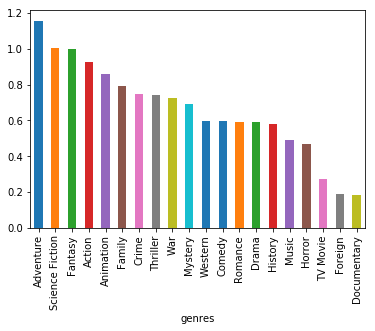

In [32]:
# to check popularity based on genres and making plot
df_new.groupby('genres')['popularity'].mean().sort_values(ascending=False).plot(kind = 'bar')



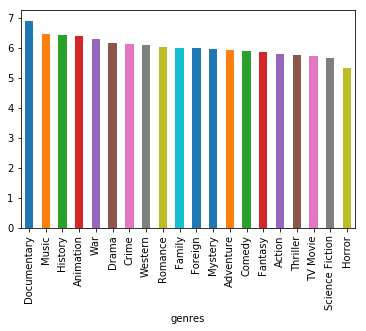

In [33]:
df_new.groupby('genres')['vote_average'].mean().sort_values(ascending=False).plot(kind = 'bar')

In [34]:
#Conclusion for first question: As it can be seen from above histogram, 
#the movie with highest popularity belong to genres = Adventure, then followed by Science fiction, Fantasy, Action and Animation.
# Average votings for all movies are almost same, with no major difference as can be seen from second histogram above.


### Research Question 2 : Best director and movie (as per average votes and popularity)

In [35]:
df_new.groupby('director')['popularity'].mean().sort_values(ascending=False).head()

director
Colin Trevorrow                16.696886
Joe Russo|Anthony Russo        12.971027
Chad Stahelski|David Leitch    11.422751
Don Hall|Chris Williams         8.691294
Juno John Lee                   8.411577
Name: popularity, dtype: float64

In [36]:
df_new.groupby('director')['vote_average'].mean().sort_values(ascending=False).head()

director
Mark Cousins        9.2
Derek Frankowski    8.8
David Mallet        8.7
Curt Morgan         8.5
Saul Swimmer        8.5
Name: vote_average, dtype: float64

In [37]:
df_new.groupby('original_title')['popularity'].mean().sort_values(ascending=False).head()

original_title
Jurassic World             32.985763
Mad Max: Fury Road         28.419936
Interstellar               24.949134
Guardians of the Galaxy    14.311205
Insurgent                  13.112507
Name: popularity, dtype: float64

In [38]:
df_new.groupby('original_title')['vote_average'].mean().sort_values(ascending=False).head()

original_title
The Story of Film: An Odyssey    9.2
The Mask You Live In             8.9
Black Mirror: White Christmas    8.8
Life Cycles                      8.8
Pink Floyd: Pulse                8.7
Name: vote_average, dtype: float64

In [39]:
# From above, it can be concluded that the best director is Colin Trevorrow and Mark Cousins, while best movies are 
#Jurassic world and The Story of Film: An Odyssey: by popularity and Average vote.

### Research Question 3 : Highest profit for a movie based on genre

In [40]:
#For finding the profit, first a new column is needed, which will be equal to revenue - budget

In [41]:
df_new.head(1)

,id,original_title,director,popularity,genres,vote_count,vote_average,budget,revenue,release_year
0,177677,Mission: Impossible - Rogue Nation,Christopher McQuarrie,4.566713,Action,2349,7.1,150000000,682330139,2015


In [42]:
df_new['profit'] = df_new['revenue'] - df_new['budget']

In [43]:
#checking profit column
df_new.head()

,id,original_title,director,popularity,genres,vote_count,vote_average,budget,revenue,release_year,profit
0,177677,Mission: Impossible - Rogue Nation,Christopher McQuarrie,4.566713,Action,2349,7.1,150000000,682330139,2015,532330139
1,214756,Ted 2,Seth MacFarlane,4.564549,Comedy,1666,6.3,68000000,215863606,2015,147863606
2,257211,The Intern,Nancy Meyers,2.814802,Comedy,1255,7.1,35000000,194564672,2015,159564672
3,295964,Burnt,John Wells,2.584264,Drama,631,6.3,20000000,36606743,2015,16606743
4,306819,The Danish Girl,Tom Hooper,2.557859,Drama,867,7.3,15000000,64191523,2015,49191523


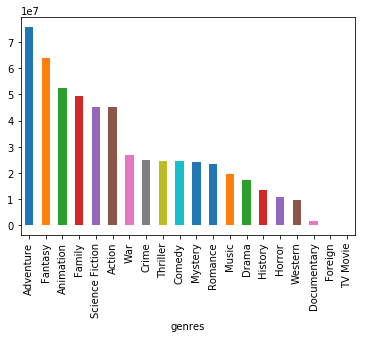

In [44]:
df_new.groupby('genres')['profit'].mean().sort_values(ascending=False).plot(kind = 'bar')

In [45]:
# FRom above, it can be concluded that the average profit is highest for adventurous movie and least for TV movie

### Research Question 4 : Does more budget lead to more revenue (correlation)

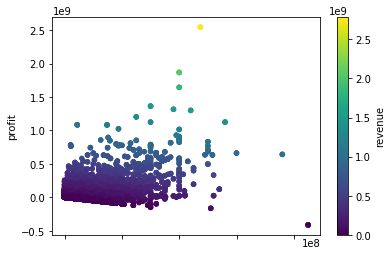

In [46]:
# this correlation can be checked as:
df_new.plot.scatter(x = 'budget', y = 'profit', c = 'revenue', colormap = 'viridis')

In [47]:
#From above, it can be concluded that usually higher budget movies make more profit, but there are few exceptions too.

### Research Question 5 : Year with highest total profit and distribution of profit in different genres

In [48]:
# I will check first: year with maximum profit of all times and then will check distribution of profit according to
#movie generes
df_new.groupby('release_year')['profit','revenue'].sum().sort_values(by = ['revenue','profit'],ascending = False).head(3)
# so 2015 is the year with highest profit, and revenue. Now I will sum the profit and revenue for year 2009, as per generes of the movie


,profit,revenue
release_year,,
2015,59139236038,82160071197
2014,48803788780,72059584262
2012,47974837413,72019644724


In [49]:
#Select dataframe with movie released in 2015 only
df_2015 = df_new[df_new['release_year'] ==2015]
df_2015.head()

,id,original_title,director,popularity,genres,vote_count,vote_average,budget,revenue,release_year,profit
0,177677,Mission: Impossible - Rogue Nation,Christopher McQuarrie,4.566713,Action,2349,7.1,150000000,682330139,2015,532330139
1,214756,Ted 2,Seth MacFarlane,4.564549,Comedy,1666,6.3,68000000,215863606,2015,147863606
2,257211,The Intern,Nancy Meyers,2.814802,Comedy,1255,7.1,35000000,194564672,2015,159564672
3,295964,Burnt,John Wells,2.584264,Drama,631,6.3,20000000,36606743,2015,16606743
4,306819,The Danish Girl,Tom Hooper,2.557859,Drama,867,7.3,15000000,64191523,2015,49191523


In [50]:
#lets comfirm that the net profit and revenue is same as above (max total profit)
df_2015['profit'].sum(), df_2015['revenue'].sum()

(59139236038, 82160071197)

In [51]:
df_2015.groupby('genres')['profit'].sum().sort_values()

genres
TV Movie             -3000000
Documentary          30270526
History              62906704
Mystery             422685130
Western             437139714
War                 492095829
Music               562485274
Horror              674321673
Romance            1279534699
Fantasy            2857039294
Crime              3125612743
Animation          3263955801
Family             3782878913
Drama              4241980714
Comedy             5460018689
Thriller           5620617271
Science Fiction    7165632103
Action             9672698002
Adventure          9990362959
Name: profit, dtype: int64

In [52]:
genres = df_2015['genres'].unique()
genres


array(['Action', 'Comedy', 'Drama', 'Thriller', 'Horror', 'Documentary',
       'TV Movie', 'Animation', 'Crime', 'Adventure', 'Science Fiction',
       'Fantasy', 'Western', 'Family', 'Mystery', 'Romance', 'War',
       'History', 'Music'], dtype=object)

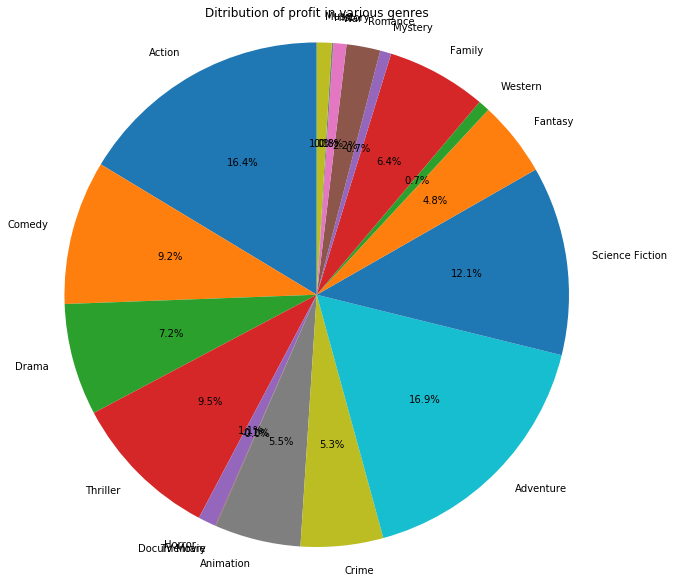

In [53]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Action', 'Comedy', 'Drama', 'Thriller', 'Horror', 'Documentary','TV Movie','Animation', 'Crime', 'Adventure', 'Science Fiction','Fantasy', 'Western', 'Family', 'Mystery', 'Romance', 'War','History', 'Music'
sizes = [9672698002, 5460018689, 4241980714, 5620617271,674321673,30270526,-3000000,3263955801,3125612743,9990362959,
        7165632103,2857039294,437139714,3782878913,422685130,1279534699,492095829,62906704,562485274]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Ditribution of profit in various genres")
plt.show()

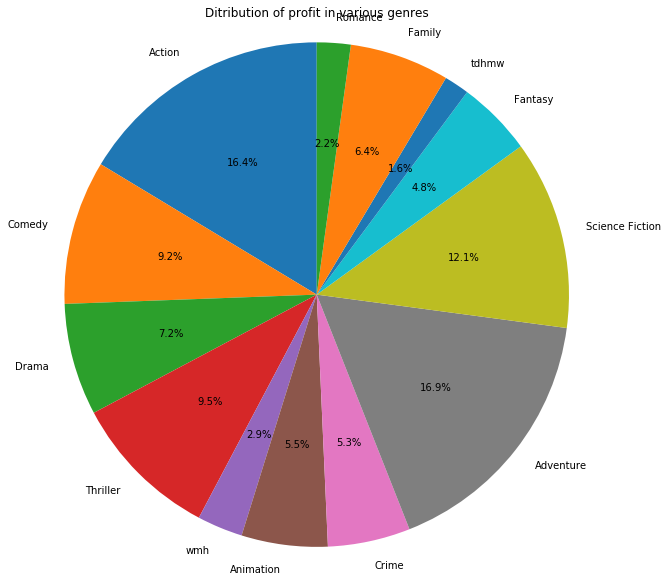

In [54]:
#It can be seen that the highest contribution of profit to otal pprofit is by adventure movies, now lets clan chart by combining
#few genres together to get a clear chart. I am combining: 
#tdhmw = [TV Movie,Documentary,History, Mystery, Western]: Profit = 950002074
#wmh = [War, Music,Horror]:Profit = 1728903000
#I calculated sum of profits manually.

labels = 'Action', 'Comedy', 'Drama', 'Thriller','wmh','Animation', 'Crime', 'Adventure','Science Fiction','Fantasy','tdhmw', 'Family', 'Romance'
sizes = [9672698002, 5460018689, 4241980714, 5620617271,1728903000, 3263955801, 3125612743,9990362959,7165632103, 2857039294,950002074, 3782878913,1279534699]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Ditribution of profit in various genres")
plt.show()
        



In [55]:
#This pie chart makes more sense and suggests contribution of various movie genres in total profit.

### Research Question 6: Number of movies per genre

In [99]:
#Now we will find number of movies per genre
df_new.groupby('genres').size()


genres
Action             2379
Adventure          1466
Animation           692
Comedy             3782
Crime              1354
Documentary         509
Drama              4755
Family             1223
Fantasy             912
Foreign             185
History             332
Horror             1636
Music               402
Mystery             809
Romance            1708
Science Fiction    1224
TV Movie            162
Thriller           2905
War                 270
Western             164
dtype: int64

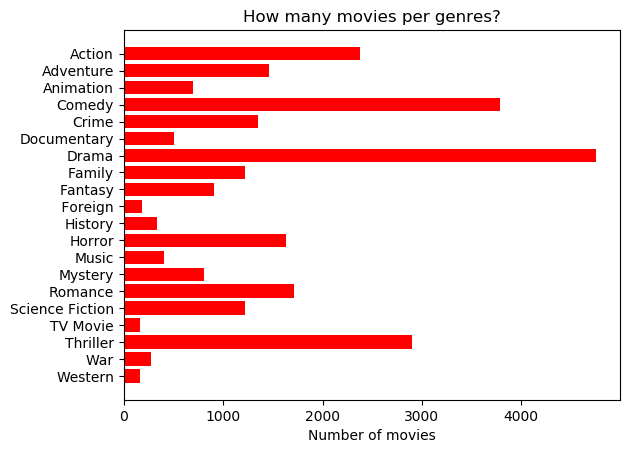

In [105]:

fig, ax = plt.subplots()
genres = ('Action', 'Adventure','Animation','Comedy','Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',' Foreign', 'History','Horror', 
          'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',  'Thriller' , 'War', 'Western')
y_pos = np.arange(len(genres))
Number_of_movies = [2379,1466, 692, 3782, 1354, 509, 4755, 1223, 912, 185, 332, 1636, 402,809,1708,1224,162,2905, 270, 164]


ax.barh(y_pos, Number_of_movies, align='center', color = 'r')
ax.set_yticks(y_pos)
ax.set_yticklabels(genres)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of movies')
ax.set_title('How many movies per genres?')

plt.show()

In [ ]:
#Here we can see that number of movies are highest in Drama genre followed by comedy and then thriller.

### Research question 7:Total revenue per genres

In [113]:
df_new.groupby('genres')['revenue'].sum()

genres
Action             173543608094
Adventure          166425793633
Animation           52603987494
Comedy             142326036180
Crime               57368134868
Documentary          1061375637
Drama              139135504255
Family              89165240116
Fantasy             88223309887
Foreign               274846449
History             10691938934
Horror              27538937718
Music               11657281626
Mystery             32576228996
Romance             61093656624
Science Fiction     86203712824
TV Movie               42000000
Thriller           121305476800
War                 12853399491
Western              4713837032
Name: revenue, dtype: int64

In [129]:
total_rev_per_genre = df_new.groupby(['genres'])['revenue'].sum().sort_values().reset_index()
total_rev_per_genre.set_index('genres', inplace  = True)
total_rev_per_genre

,revenue
genres,
TV Movie,42000000
Foreign,274846449
Documentary,1061375637
Western,4713837032
History,10691938934
Music,11657281626
War,12853399491
Horror,27538937718
Mystery,32576228996


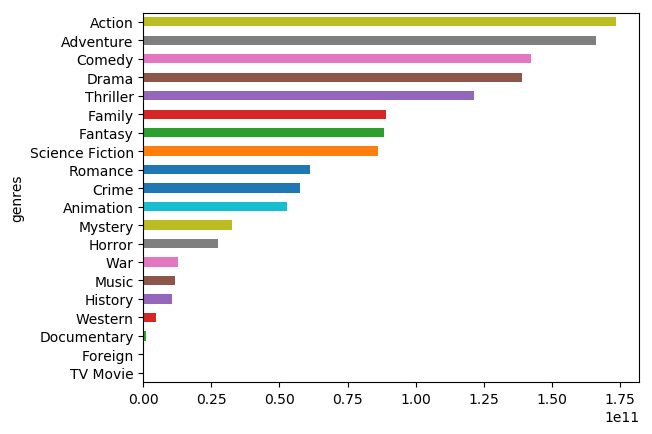

In [139]:
total_rev_per_genre.plot(y='revenue', kind='barh', legend=False)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

From above studies the conclusion can be drwan as:
Most popular movies are adventurous followed by science/fiction.
Best director = Colin treverrow
Movies = Juraasic world
Highest profitable genre = adventure
More budget = more profit
2015 year had highest revenue, and adventure movies contributed to 16.9% of total
Number of movies is highest in Drama genre
Action movies has highest revenue

In [140]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0